In [35]:
# imports
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import Image, display
import scipy.stats as stats

# Fundamentos de estadística descriptiva

### Ciencia de Datos para físicos: teoría y aplicaciones.

En este notebook se presentan las distribuciones de probabilidad más comunes en la estadística descriptiva. Se presentan ejemplos de su uso en el análisis de datos.

#### Variables aleatorias

Una variable aleatoria es una variable matemática que toma diferentes valores con diferentes probabilidades. Es una medida estadística utilizada para describir cualquier proceso que tiene resultados inciertos.

Hay dos tipos de variables aleatorias: discretas y continuas. Una variable aleatoria discreta solo puede tomar valores finitos o contables, mientras que una variable aleatoria continua puede tomar cualquier valor en un rango específico. Por ejemplo, el número de personas en una sala es una variable aleatoria discreta, mientras que la altura de una persona es una variable aleatoria continua.

La variable aleatoria tiene una función de distribución de probabilidad asociada a ella, que describe la probabilidad de que la variable tome cada uno de sus valores posibles. Esta función de distribución de probabilidad es la base para el cálculo de probabilidades y para la estimación de parámetros estadísticos.


### Distribuciones de probabilidad discretas

#### Distribución binomial

Describe el número de éxitos en un número fijo de ensayos independientes, cada uno con una probabilidad fija de éxito. Se caracteriza por dos parámetros: $n$, el número de ensayos, y $p$, la probabilidad de éxito en un solo ensayo.

La función de probabilidad de la distribución binomial se puede calcular utilizando la fórmula:
$$P[X = k] = \binom{n}{k} p^{k}(1-p)^{n-k}$$

Esta distribución realiza los siguientes supuestos: **Cada ensayo es independiente**, **Cada ensayo tiene dos resultados posibles**, **La probabilidad de éxito siempre es la misma en cada ensayo**.

La media de la distribución binomial es $np$ y su varianza es $np(1-p)$.

La distribución binomial tiene una variedad de aplicaciones en ciencia de datos, entre ellas:
* Modelar el número de errores en un proceso de producción
* Modelar el número de clientes que compran un producto en un día específico
* Modelar el número de defectos en un producto

Es importante saber que cuando el número de ensayos es grande y la probabilidad de éxito es pequeña, la distribución binomial se aproxima a la distribución normal, lo que permite usar herramientas estadísticas que requieren distribuciones normales.

In [36]:
""" Ejemplo 1: Si sabemos que un vendedor de tarjetas de crédito tiene un 30% de vender
¿Cuál es la probabilidad de que venda exactamente 3 de 5 tarjetas?
"""

intentos, probabilidad_venta = 5, 0.3
# Obtengamos la distribución binomial
binomial = stats.binom(n = intentos, p = probabilidad_venta)

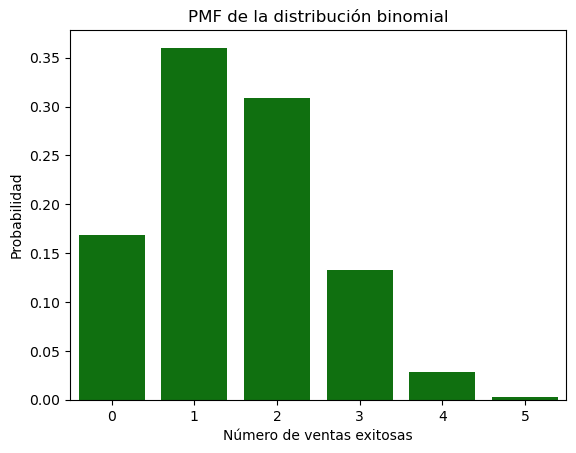

In [37]:
intentos_discretos = np.arange(0, intentos + 1)
mass_function = binomial.pmf(intentos_discretos)
# Grafiquemos la PMF probability mass function (así se llama la PDF para variables discretas)
_ = sns.barplot(x = intentos_discretos,y = mass_function, color='green')
_ = plt.ylabel('Probabilidad')
_ = plt.xlabel('Número de ventas exitosas')
_ = plt.title('PMF de la distribución binomial')

Al ver la gráfica, podemos ver que la probabilidad de vender 3 tarjetas en 5 intentos es de 0.1323, es decir, el 13.23% de las veces se venderán 3 tarjetas en 5 intentos.

In [38]:
# ¿Cuál es la probabilidad de que venda 3 tarjetas o menos?
# P(X <= 5), Para esto usamos la función de distribución acumulada
probabilidad_venta_3_tarjetas = binomial.cdf(3)
print(probabilidad_venta_3_tarjetas*100)

# o bien
print((mass_function[:4].sum())*100)

96.922
96.92199999999995


In [39]:
#¿Cuál es la probabilidad de que venda 3 tarjetas o más?
print((1 - probabilidad_venta_3_tarjetas)*100)

# o bien
print(binomial.sf(3)*100)

3.078000000000003
3.0779999999999994


#### Distribución geométrica